# SSVEP Project Overview

Steady-State Visually Evoked Potentials (SSVEP) are brain responses to visual stimuli that flicker at specific frequencies. Analyzing SSVEPs is crucial in various fields, including neuroscience, brain-computer interfaces (BCIs), and cognitive psychology. In this project, I perform SSVEP analysis, including temporal and frequency analysis, compare Signal-to-Noise Ratio (SNR), and visualize the results.

## Features

- **Frequency Analysis:** Extract and analyze frequency components related to SSVEPs.
- **Visualization:** Generate plots to visualize SSVEP responses and patterns.

## Data Used

This project utilizes a single-subject dataset collected in the Lab for Neuroergonomics (LFNE) at National Sun Yat-Sen University (Kaohsiung, Taiwan). The dataset includes:

- **Electrodes:** Data recorded from 30 electrodes placed according to the 10/20 international electrode placement system.
- **Stimuli Frequencies:** The experiment is designed to analyze the efficiency of different frequency stimulations for use in SSVEP paradigms in BCI implementations. The stimulation frequencies include 6, 8, 10, 12, 14, 20, 25, and 30 Hz.
- **Experimental Conditions:** Each trial lasts 4 seconds, with 4-second breaks between trials. There are approximately 20 trials for each stimulation frequency. Note that since the dataset was recorded within LFNE, it is not included in the current repository.


In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from typing import List

def load_eeg_data(file_path: str) -> mne.Epochs:
    """
    Load EEG data from an EEGLAB .set file.

    Parameters:
    - file_path (str): Path to the .set file.

    Returns:
    - epochs (mne.Epochs): Loaded EEG epochs.
    """
    try:
        epochs = mne.io.read_epochs_eeglab(file_path)
        print(f"EEG data loaded successfully from {file_path}.")
        return epochs
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        raise
    except Exception as e:
        print(f"An error occurred while loading data: {e}")
        raise


def verify_data_structure(epochs: mne.Epochs) -> None:
    """
    Print information about the EEG epochs data structure.

    Parameters:
    - epochs (mne.Epochs): The EEG epochs to inspect.
    """
    print("EEG Data Information:")
    print(epochs.info)
    print("\nFirst 5 Events:")
    print(epochs.events[:5])


def setup_montage(epochs: mne.Epochs, montage_name: str = 'standard_1005') -> mne.Epochs:
    """
    Set up and apply a standard montage to the EEG data.

    Parameters:
    - epochs (mne.Epochs): The EEG epochs to set montage for.
    - montage_name (str): Name of the standard montage to use.

    Returns:
    - epochs (mne.Epochs): EEG epochs with the applied montage.
    """
    try:
        montage = mne.channels.make_standard_montage(montage_name)
        print(f"Standard montage '{montage_name}' created.")
    except ValueError as e:
        print(f"Error creating montage: {e}")
        raise

    print("Data Channels:", epochs.info['ch_names'])
    print("Montage Channels:", montage.ch_names)

    epochs.set_montage(montage, match_case=False)
    print("Montage set for EEG data.")

    return epochs


def plot_sensors(epochs: mne.Epochs, show_names: bool = True) -> None:
    """
    Plot the sensor locations to verify montage setup.

    Parameters:
    - epochs (mne.Epochs): The EEG epochs with montage set.
    - show_names (bool): Whether to display channel names.
    """
    try:
        epochs.plot_sensors(show_names=show_names)
        print("Sensor plot generated.")
    except Exception as e:
        print(f"An error occurred while plotting sensors: {e}")
        raise


def print_event_information(epochs: mne.Epochs) -> None:
    """
    Print event information from the EEG epochs.

    Parameters:
    - epochs (mne.Epochs): The EEG epochs containing event information.
    """
    print("\nEvent Information:")
    print(epochs.events[:5])
    unique_event_ids = np.unique(epochs.events[:, 2])
    print(f"Unique Event IDs: {unique_event_ids}")

# Define the file path to your EEG data
file_path = 'Subject 14 5 sessions filtered.set'

# Load EEG data using the defined function
epochs = load_eeg_data(file_path)

# Verify the structure of the loaded data
verify_data_structure(epochs)


Extracting parameters from c:\Users\xiaom\OneDrive\Documents\Projects for github\SSVEP stimulation and analysis\S2Analysis\SSVEP python analysis\Subject 14 5 sessions filtered.set...
Not setting metadata
177 matching events found
No baseline correction applied
0 projection items activated
Ready.
<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, FZ, F4, F8, FT7, FC3, FCZ, FC4, FT8, T3, C3, ...
 chs: 30 EEG
 custom_ref_applied: False
 dig: 33 items (3 Cardinal, 30 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 30
 projs: []
 sfreq: 250.0 Hz
>
[[   1    0    1]
 [1001    0    2]
 [2001    0    3]
 [3001    0    4]
 [4001    0    5]]


C:\Users\xiaom\AppData\Local\Temp\ipykernel_15372\2150586299.py:7: RuntimeWarning: Data file name in EEG.data (Jason1234530filt.fdt) is incorrect, the file name must have changed on disk, using the correct file name (Subject 14 5 sessions filtered.fdt).
  epochs = mne.io.read_epochs_eeglab(file_path)


Data channels: ['FP1', 'FP2', 'F7', 'F3', 'FZ', 'F4', 'F8', 'FT7', 'FC3', 'FCZ', 'FC4', 'FT8', 'T3', 'C3', 'CZ', 'C4', 'T4', 'TP7', 'CP3', 'CPZ', 'CP4', 'TP8', 'T5', 'P3', 'PZ', 'P4', 'T6', 'O1', 'OZ', 'O2']
Montage channels: ['Fp1', 'Fpz', 'Fp2', 'AF9', 'AF7', 'AF5', 'AF3', 'AF1', 'AFz', 'AF2', 'AF4', 'AF6', 'AF8', 'AF10', 'F9', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'F10', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T9', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'T10', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO9', 'PO7', 'PO5', 'PO3', 'PO1', 'POz', 'PO2', 'PO4', 'PO6', 'PO8', 'PO10', 'O1', 'Oz', 'O2', 'I1', 'Iz', 'I2', 'AFp9h', 'AFp7h', 'AFp5h', 'AFp3h', 'AFp1h', 'AFp2h', 'AFp4h', 'AFp6h', 'AFp8h', 'AFp10h', 'AFF9h', 'AFF7h', 'AFF5h', 'AFF3h', 'AFF1h', 'AFF2h', 'AFF4h', 'AFF6h', 'AFF8h', 'AFF10h', 'FFT9h', 'FFT7h', 'FF

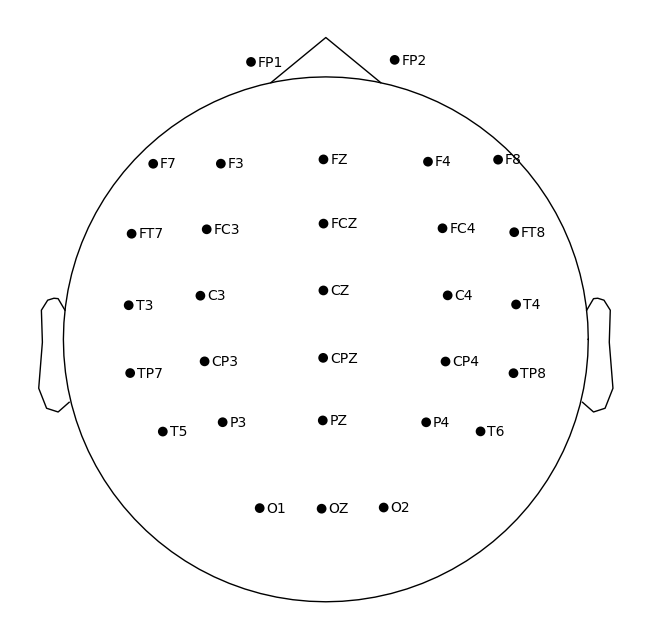


Event information:
[[   1    0    1]
 [1001    0    2]
 [2001    0    3]
 [3001    0    4]
 [4001    0    5]]
Event IDs: [1 2 3 4 5 6 7 8 9]


In [53]:

import mne
import numpy as np
import matplotlib.pyplot as plt

# Load EEG data from local file
file_path = 'Subject 14 5 sessions filtered.set'
epochs = mne.io.read_epochs_eeglab(file_path)

# Verify the data structure
print(epochs.info)
print(epochs.events[:5])


# Set up montage (only if channel names match standard 1005 system)
montage = mne.channels.make_standard_montage('standard_1005')

# Check channel names
print("Data channels:", epochs.info['ch_names'])
print("Montage channels:", montage.ch_names)

# Set montage
epochs.set_montage(montage, match_case=False)  # match_case=False for case-insensitive matching

# Verify montage setup
epochs.plot_sensors(show_names=True)

# If you need event information, access it from the epochs object
print("\nEvent information:")
print(epochs.events[:5])  # Show first 5 events
print("Event IDs:", np.unique(epochs.events[:, 2]))

Original event mapping: {'7': 1, '9': 2, '1': 3, '8': 4, '4': 5, '6': 6, '5': 7, '3': 8, '2': 9}


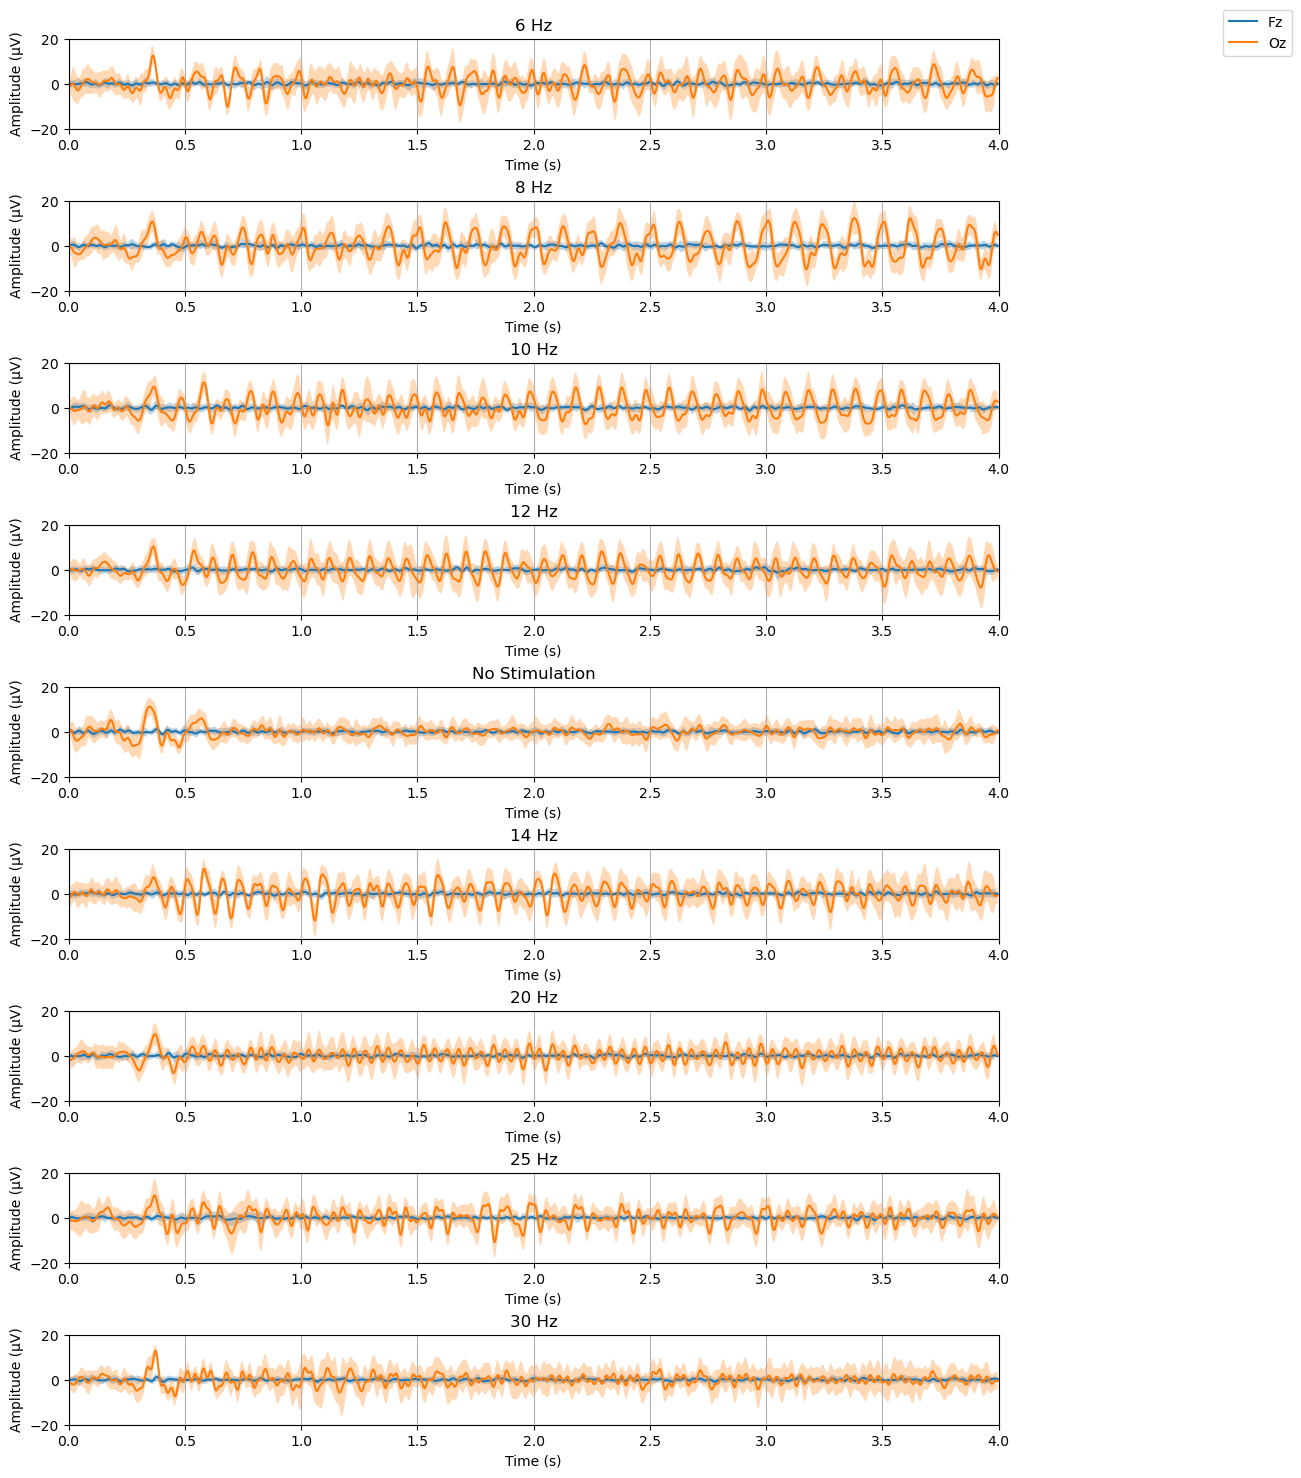

In [54]:
from matplotlib.pyplot import figure
import numpy as np

# Original event labels in desired order
event_labels = ['6 Hz','8 Hz','10 Hz', '12 Hz', 'No Stimulation', '14 Hz',
              '20 Hz','25 Hz','30 Hz']

# Get the actual trigger codes from your data
print("Original event mapping:", epochs.event_id)

# Create a new ordered mapping based on your stimulation frequencies
# First sort the trigger codes numerically
sorted_triggers = sorted(epochs.event_id.keys(), key=lambda x: int(x))
new_event_id = {label: int(trigger) for label, trigger in zip(event_labels, sorted_triggers)}

# Create a list of event keys in the desired order
event_order = [str(trigger) for trigger in sorted(epochs.event_id.values())]

# Now plot using the correct mapping
fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(12, 18))
plt.subplots_adjust(hspace=0.8)

# Get channel indices (case-insensitive)
channel_names = [name.upper() for name in epochs.info['ch_names']]
fzIdx = channel_names.index('FZ')
ozIdx = channel_names.index('OZ')

for idx, (label, trigger) in enumerate(zip(event_labels, sorted_triggers)):
    # Get the actual event ID from the original mapping
    event_id = epochs.event_id[trigger]
    
    # Select epochs for this event type
    data = epochs[str(trigger)].get_data() * 1e6  # Convert to µV
    
    # Plotting
    ax = axes[idx]
    
    # Fz channel
    fz_mean = np.mean(data[:, fzIdx, :], axis=0)
    fz_std = np.std(data[:, fzIdx, :], axis=0)
    ax.plot(epochs.times, fz_mean, label='Fz')
    ax.fill_between(epochs.times, fz_mean - fz_std, fz_mean + fz_std, alpha=0.3)
    
    # Oz channel
    oz_mean = np.mean(data[:, ozIdx, :], axis=0)
    oz_std = np.std(data[:, ozIdx, :], axis=0)
    ax.plot(epochs.times, oz_mean, label='Oz')
    ax.fill_between(epochs.times, oz_mean - oz_std, oz_mean + oz_std, alpha=0.3)
    
    ax.set(title=label, xlim=[0, 4], ylim=[-20, 20])
    ax.grid(True)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude (µV)')

# Add legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.15, 0.9))
plt.show()

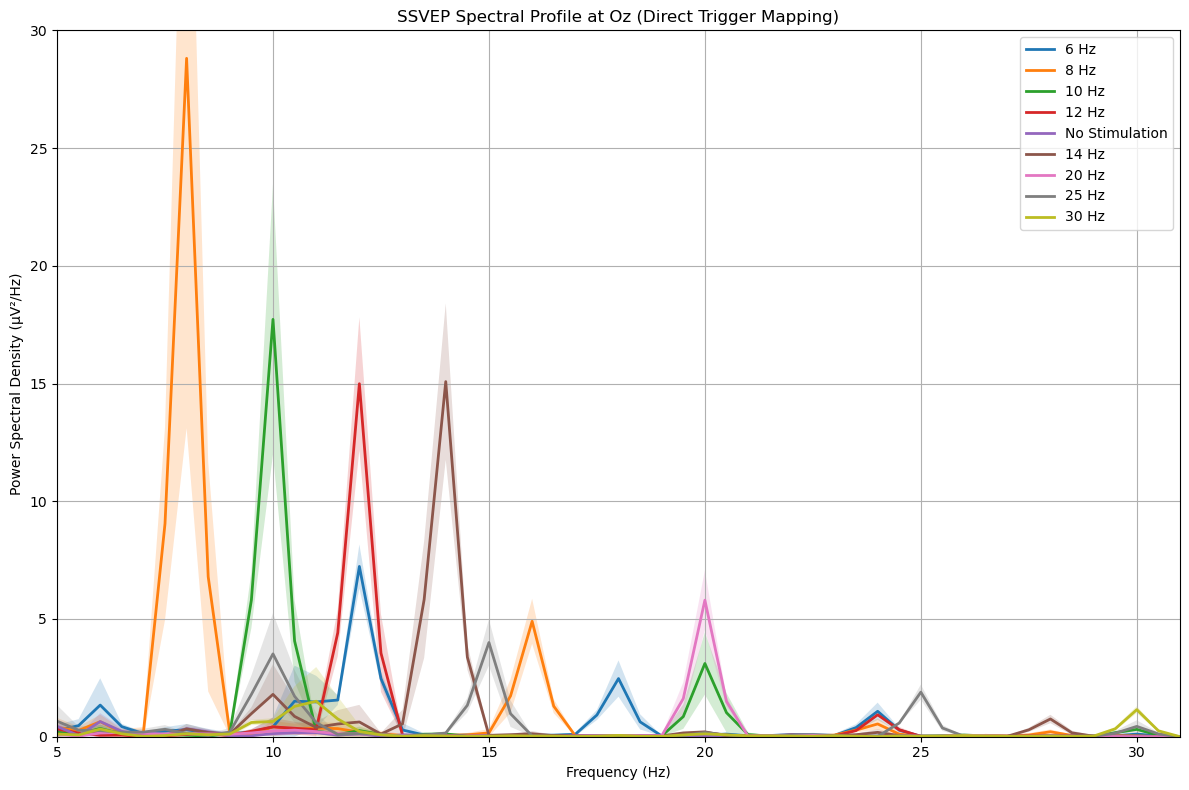

In [106]:
# SSVEP Spectral Profile (Correct 1:1 Mapping)
from scipy import signal

# Create direct trigger-to-label mapping
manual_mapping = {
    '1': '6 Hz',
    '2': '8 Hz',
    '3': '10 Hz',
    '4': '12 Hz',
    '5': 'No Stimulation',
    '6': '14 Hz',
    '7': '20 Hz',
    '8': '25 Hz',
    '9': '30 Hz'
}

# Get channel indices
channel_names = [name.upper() for name in epochs.info['ch_names']]
ozIdx = channel_names.index('OZ')

plt.figure(figsize=(12, 8))

# Plot in numerical trigger order
for trigger in sorted(manual_mapping.keys(), key=int):
    label = manual_mapping[trigger]
    data = epochs[trigger].get_data() * 1e6  # µV
    ozData = data[:, ozIdx, :]
    
    # Compute spectrogram
    f, _, P = signal.spectrogram(np.mean(ozData, axis=0),
                                fs=250,
                                window='hann',
                                nperseg=500,
                                noverlap=250,
                                nfft=500,
                                mode='psd')
    
    # Average across time windows
    avgP = np.mean(P, axis=1)
    stdP = np.std(P, axis=1)
    
    # Plot up to 31 Hz
    freq_mask = f <= 31
    plt.plot(f[freq_mask], avgP[freq_mask], linewidth=2, label=label)
    plt.fill_between(f[freq_mask], 
                    avgP[freq_mask] - stdP[freq_mask],
                    avgP[freq_mask] + stdP[freq_mask], 
                    alpha=0.2)

plt.xlim(5, 31)
plt.ylim(0, 30)
plt.grid(True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (µV²/Hz)')
plt.title('SSVEP Spectral Profile at Oz (Direct Trigger Mapping)')
plt.legend()
plt.tight_layout()
plt.show()

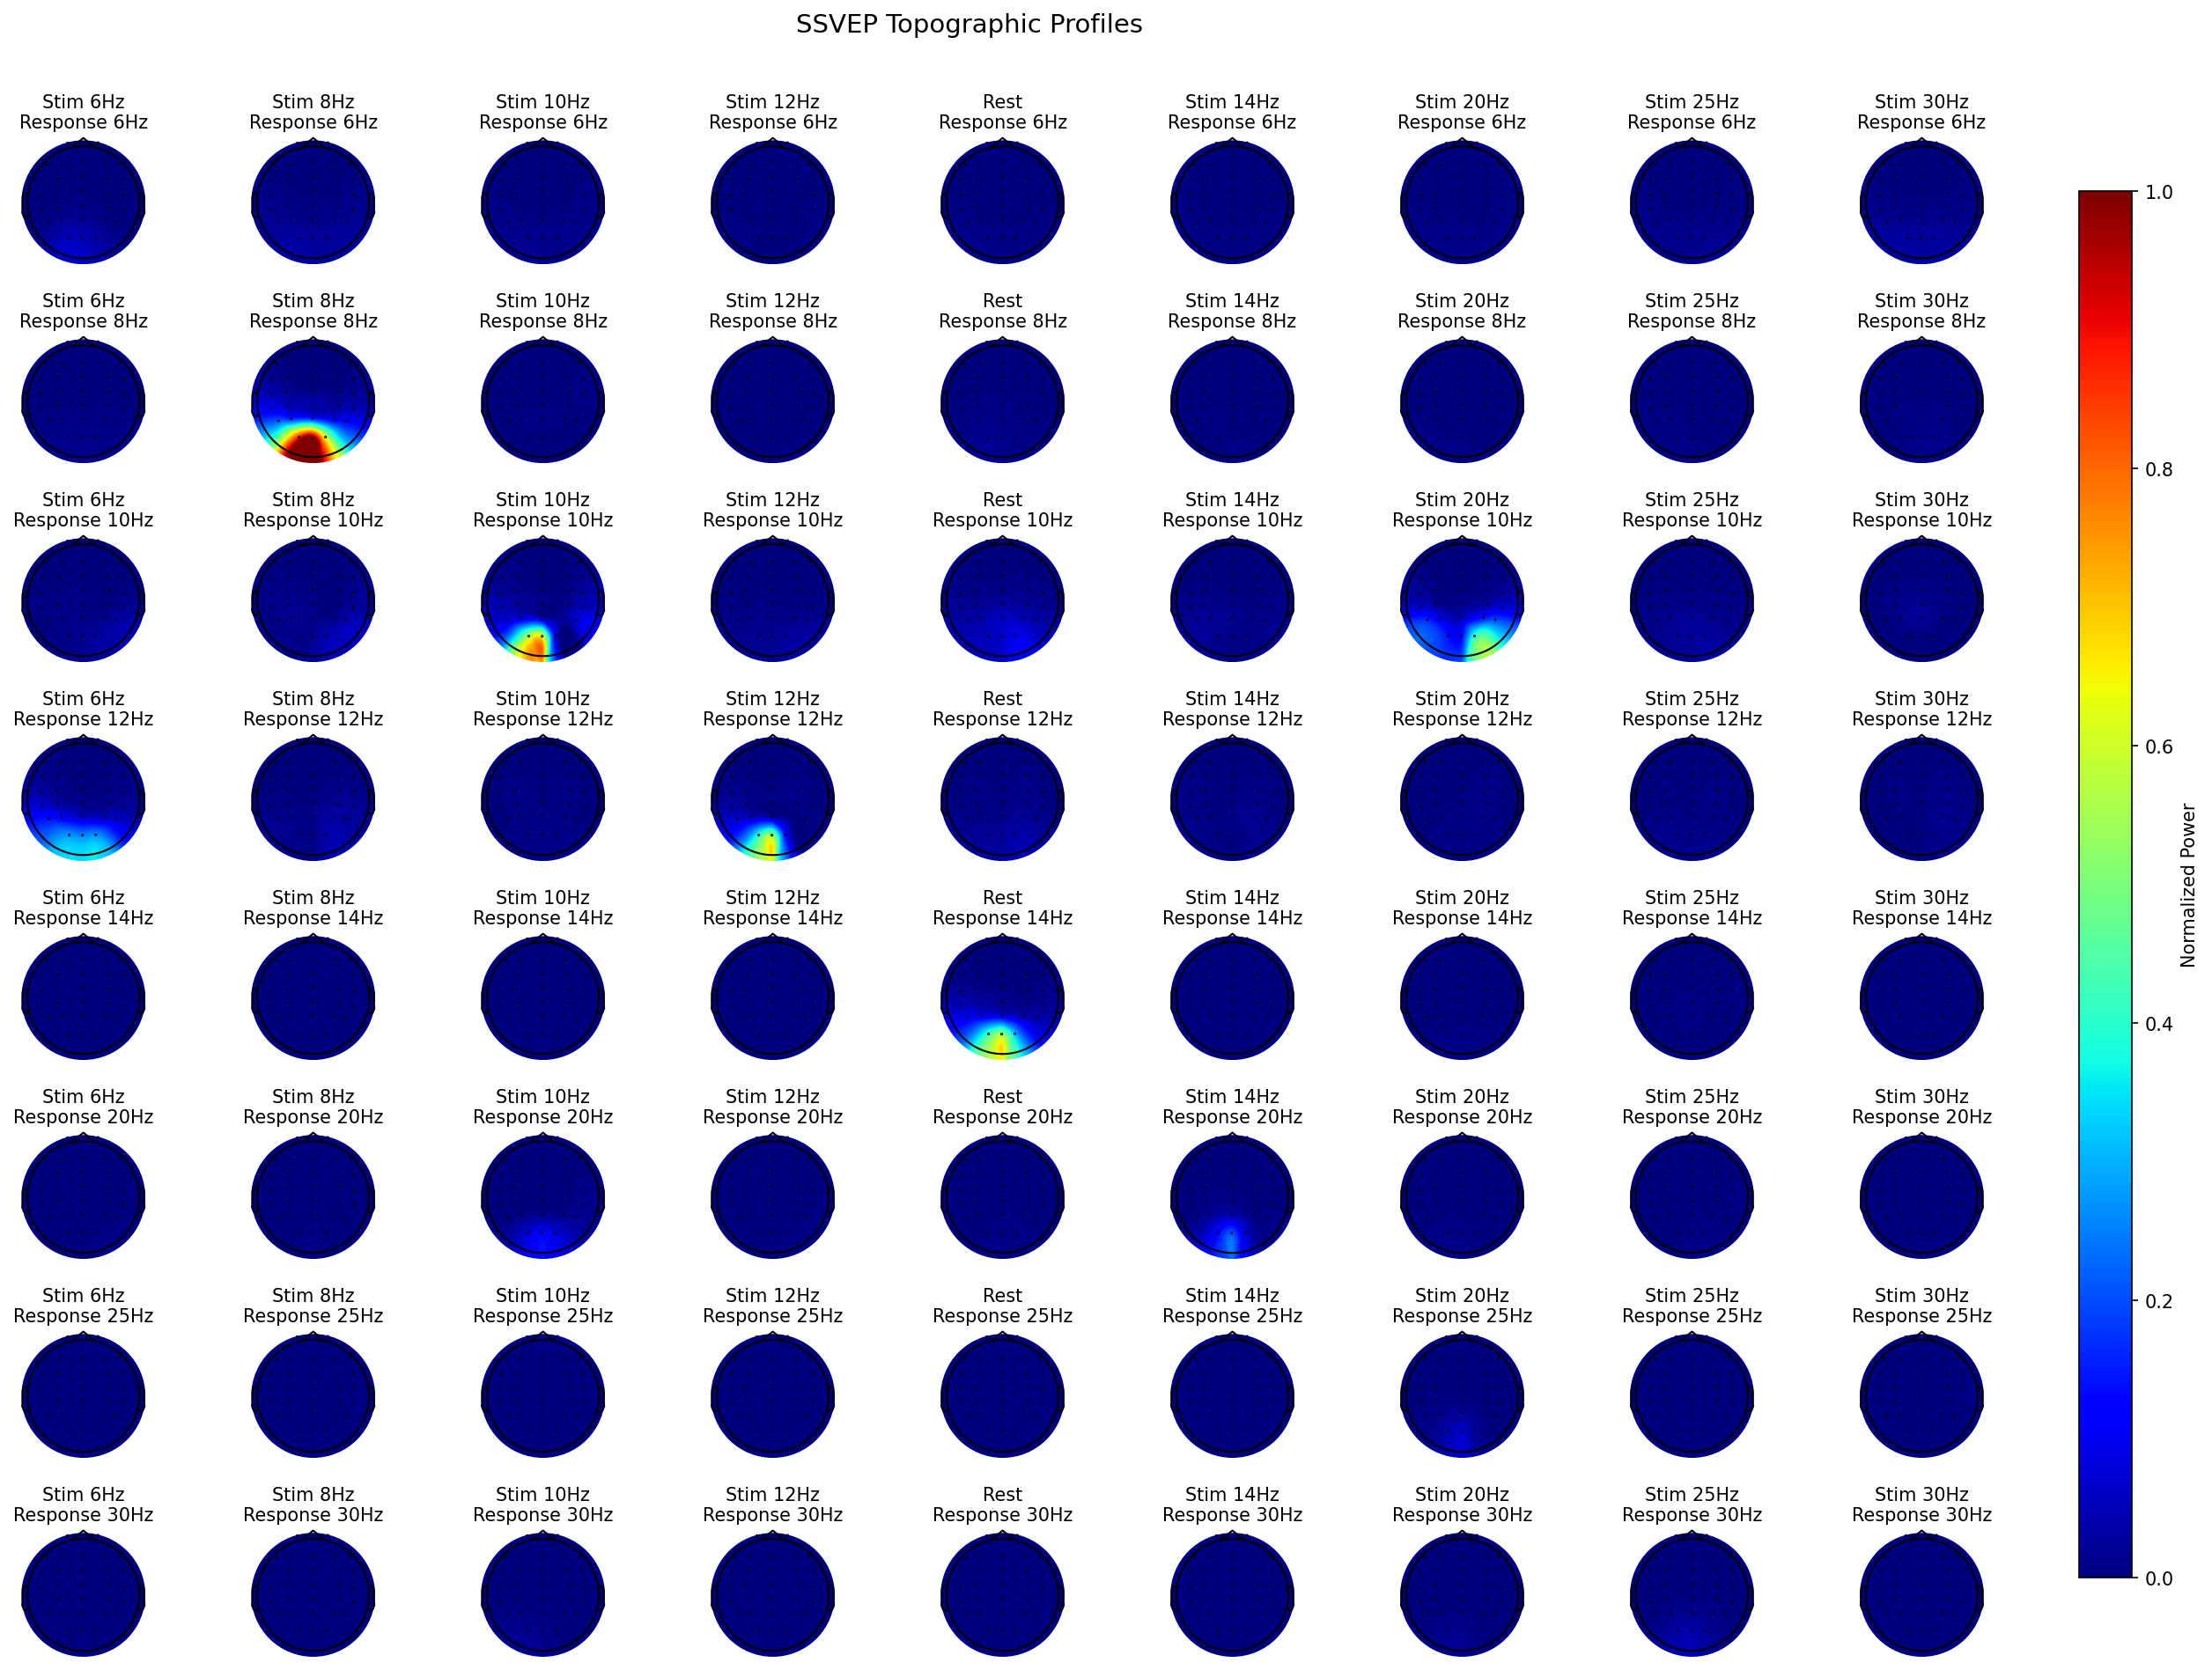

In [131]:
# Topographic plot with corrected frequency mapping
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import mne

# Create frequency mapping based on our manual mapping
frequency_order = ['6 Hz', '8 Hz', '10 Hz', '12 Hz', '14 Hz', '20 Hz', '25 Hz', '30 Hz', 'No Stimulation']
stim_freqs = [6, 8, 10, 12, 0, 14, 20, 25, 30]  # Actual stimulation frequencies
response_freqs = [6, 8, 10, 12, 14, 20, 25, 30]  # Frequencies to show in responses

# Initialize power matrix (stimuli × channels × frequency bins)
topoP = np.zeros((len(frequency_order), len(epochs.ch_names), 251))

# Process each frequency condition
for stim_idx, freq_label in enumerate(frequency_order):
    trigger = str(list(manual_mapping.keys())[list(manual_mapping.values()).index(freq_label)])
    data = epochs[trigger].get_data() * 1e6  # Restore scaling
    
    for ch_idx in range(len(epochs.ch_names)):
        # Average epochs FIRST
        averaged_data = np.mean(data[:, ch_idx, :], axis=0)
        
        # Then compute PSD
        f, _, P = signal.spectrogram(averaged_data, fs=250, 
                                    window='hann', nperseg=500,
                                    noverlap=250, nfft=500,
                                    mode='psd')
        topoP[stim_idx, ch_idx, :] = np.mean(P, axis=1)

# Calculate GLOBAL normalization
global_min = np.min(topoP)  # Minimum across all conditions and frequencies
global_max = np.max(topoP)  # Maximum across all conditions and frequencies
    
norTopoP = (topoP - global_min) / (global_max - global_min)
# Plot with global normalization
fig, axes = plt.subplots(nrows=len(response_freqs), ncols=len(stim_freqs), 
                        figsize=(20, 15), dpi=150)
plt.subplots_adjust(hspace=0.5, wspace=0.1)
for stim_idx, stim_freq in enumerate(stim_freqs):
    for resp_idx, resp_freq in enumerate(response_freqs):
        # Find frequency bin closest to the desired response frequency, in case it's not exact
        freq_bin = np.argmin(np.abs(f - resp_freq))
        
        # Plot with fixed global limits
        mne.viz.plot_topomap(norTopoP[stim_idx, :, freq_bin], epochs.info,
                            vlim=(0, 1),
                            axes=axes[resp_idx, stim_idx],
                            cmap='jet', 
                            show=False,
                            contours=False)
        
        # Add titles
        title = (f'Rest\nResponse {resp_freq}Hz' if stim_freq == 0 
                 else f'Stim {stim_freq}Hz\nResponse {resp_freq}Hz')
        axes[resp_idx, stim_idx].set_title(title, fontsize=10, pad=1)

# Add unified colorbar
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(0, 1), cmap='jet'), 
             cax=cax).set_label(f'Normalized Power')

plt.suptitle('SSVEP Topographic Profiles', y=0.94, fontsize=14)
plt.show()

C:\Users\xiaom\AppData\Local\Temp\ipykernel_15372\2387386453.py:88: RuntimeWarning: Mean of empty slice
  snr_results.append(np.nanmean(ch_snr, axis=0))  # Avg across trials
C:\Users\xiaom\AppData\Local\Temp\ipykernel_15372\2387386453.py:88: RuntimeWarning: Mean of empty slice
  snr_results.append(np.nanmean(ch_snr, axis=0))  # Avg across trials
C:\Users\xiaom\AppData\Local\Temp\ipykernel_15372\2387386453.py:88: RuntimeWarning: Mean of empty slice
  snr_results.append(np.nanmean(ch_snr, axis=0))  # Avg across trials
C:\Users\xiaom\AppData\Local\Temp\ipykernel_15372\2387386453.py:88: RuntimeWarning: Mean of empty slice
  snr_results.append(np.nanmean(ch_snr, axis=0))  # Avg across trials
C:\Users\xiaom\AppData\Local\Temp\ipykernel_15372\2387386453.py:88: RuntimeWarning: Mean of empty slice
  snr_results.append(np.nanmean(ch_snr, axis=0))  # Avg across trials
C:\Users\xiaom\AppData\Local\Temp\ipykernel_15372\2387386453.py:88: RuntimeWarning: Mean of empty slice
  snr_results.append(np.na

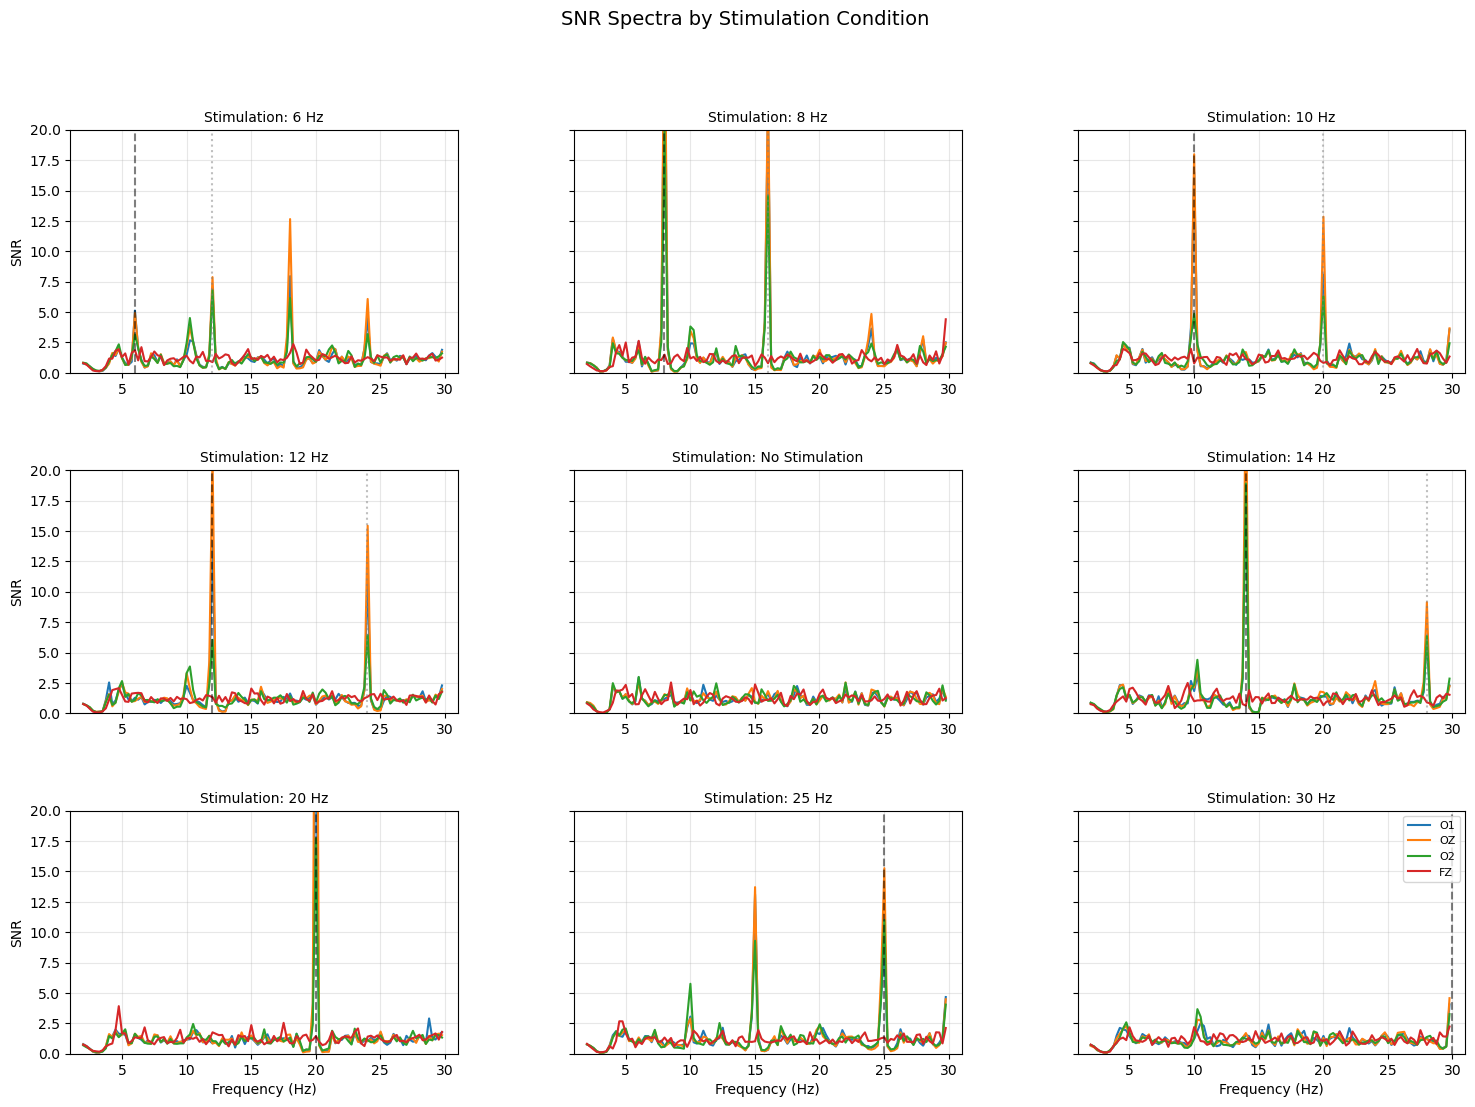

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Configuration
channels_of_interest = ['O1', 'OZ', 'O2', 'FZ']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # O1, Oz, O2, Fz
fmin, fmax = 1.0, 31.0  # Limited to 31 Hz
tmin, tmax = 0.0, 3.996  # Full epoch length

# {'7': 1, '9': 2, '1': 3, '8': 4, '4': 5, '6': 6, '5': 7, '3': 8, '2': 9}

# Define all 9 events with their frequencies (include 'No Stimulation')
event_dict = {
    '6 Hz': 3, '8 Hz': 9, '10 Hz': 8,
    '12 Hz': 5, 'No Stimulation': 7, '14 Hz': 6,
    '20 Hz': 1, '25 Hz': 4, '30 Hz': 2
}
stim_freqs = list(event_dict.values())

# Compute PSD using Welch's method
spectrum = epochs.compute_psd(
    method='welch',
    n_fft=int(epochs.info['sfreq'] * (tmax - tmin)),
    n_overlap=0,
    n_per_seg=None,
    tmin=tmin,
    tmax=tmax,
    fmin=fmin,
    fmax=fmax,
    window='boxcar',
    verbose=False
)
psds, freqs = spectrum.get_data(return_freqs=True)

# Fixed SNR calculation function
def snr_spectrum(psd, noise_n_neighbor_freqs=3, noise_skip_neighbor_freqs=1):
    """Compute SNR spectrum with proper padding"""
    # Create averaging kernel
    n_neighbors = noise_n_neighbor_freqs
    n_skip = noise_skip_neighbor_freqs
    kernel = np.concatenate((
        np.ones(n_neighbors),
        np.zeros(2 * n_skip + 1),
        np.ones(n_neighbors)
    ))
    kernel /= kernel.sum()

    # Calculate mean noise
    mean_noise = np.apply_along_axis(
        lambda x: np.convolve(x, kernel, mode='valid'),
        axis=-1, arr=psd
    )

    # Calculate padding
    edge_width = n_neighbors + n_skip
    pad_width = [(0, 0)] * (mean_noise.ndim - 1) + [(edge_width, edge_width)]
    
    # Pad with NaNs
    mean_noise = np.pad(
        mean_noise, 
        pad_width=pad_width,
        mode='constant',
        constant_values=np.nan
    )

    return psd / mean_noise

# Prepare figure
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

# Get channel indices
channel_indices = [epochs.ch_names.index(ch.upper()) for ch in channels_of_interest]

# Process each stimulation condition
for ax_idx, (event_name, event_id) in enumerate(event_dict.items()):
    # Select epochs for this event
    event_mask = epochs.events[:, 2] == event_id
    event_psds = psds[event_mask]
    
    # Calculate SNR for each channel
    snr_results = []
    for ch_idx in channel_indices:
        ch_psds = event_psds[:, ch_idx, :]
        ch_snr = snr_spectrum(ch_psds)
        snr_results.append(np.nanmean(ch_snr, axis=0))  # Avg across trials
    
    # Plotting
    ax = axes[ax_idx]
    freq_mask = (freqs >= fmin) & (freqs <= fmax)
    plot_freqs = freqs[freq_mask]
    
    for color, ch_name, snr in zip(colors, channels_of_interest, snr_results):
        ax.plot(plot_freqs, snr[freq_mask], color=color, linewidth=1.5, label=ch_name)
    
    # Add stimulation frequency marker if applicable
    if 'Hz' in event_name:
        stim_freq = int(event_name.split()[0])
        ax.axvline(stim_freq, color='black', linestyle='--', alpha=0.5)
        ax.axvline(2*stim_freq, color='gray', linestyle=':', alpha=0.5)  # 2nd harmonic
    
    # Format subplot
    ax.set_title(f'Stimulation: {event_name}', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(fmin, fmax)
    ax.set_ylim(0, 20)
    
    # Only show labels on bottom row and leftmost column
    if ax_idx >= 6:
        ax.set_xlabel('Frequency (Hz)')
    if ax_idx % 3 == 0:
        ax.set_ylabel('SNR')
    else:
        ax.set_yticklabels([])

# Add legend to last subplot
axes[-1].legend(loc='upper right', fontsize=8)

# Add overall title
plt.suptitle('SNR Spectra by Stimulation Condition', y=0.98, fontsize=14)
plt.show()